# Trabalho Final - Algebra Linear e Aplicações

### Participantes:
#### Jorge Augusto Salgado Salhani
- No. USP: 8927418

#### Driely Fernanda Oliveira de Abreu
- No. USP: 11879575

## Tema Escolhido: 

## Sistemas Dinâmicos: Solução com autovalores e estabilidade via Jacobiano

### Visão Geral

#### Introdução

Sistenas dinâmicos consistem de variáveis que representam alguma entidade que desejamos descrever ao longo do tempo. Como a complexidade de qualquer objeto ou fenômeno físico que desejamos estudar é infinitamente grande no mundo real, precisamos reduzir o número de variáveis para que possamos estudá-lo. A este conjunto de parâmetros reduzidos que descrevem um certo fenômeno damos o nome de modelo.

Por representar a evolução de um fenômeno no tempo, um sistema dinâmico que modelamos pode ser descrito por meio de equações diferenciais. Esta forma de modelagem matemática é bastante visível em sistemas físicos que citamos em sequência.

Podemos considerar uma partícula em movimento retilíneo uniforme. Caso não haja forças atuantes sobre ela, temos

$$
x(t) = x_0 + v_0 t
$$

Por outro lado, caso seja uma partícula em movimento de queda, a equação que a descreve é dada por

$$
x(t) = x_0 + v_0 t - \frac{g t^2}{2}
$$

Onde, para ambas equações, $x_0 = x(t=0)$, $v_0 = v(t=0)$ e $g$ a aceleração da gravidade.

Por trás das equações de movimento acima, respectivamente, valem as seguintes formulações

$$
\frac{d x}{d t} = \dot{x} = v_0 \quad \quad \frac{d x}{d t} = \ddot{x} = \dot{v} = -g
$$

Para a primeira, a velocidade é constante. Para a segunda, a aceleração (derivada temporal da velocidade, ou segunda derivada da posição $x$) é constante.

Outras equações diferenciais interessantes são

Sistema massa-mola simples:
$$
m\ddot{x}(t) + k x(t) = 0 \implies x(t) = x_0 + A cos(\sqrt{k/m} t)
$$

Sistema massa-mola amortecido:
$$
m\ddot{x}(t) + b\dot{x}(t) + k x = 0 \implies x(t) = x_0 + A e^{-(b/2m)t}cos(\sqrt{k/m} t)
$$

Equação de Schrodinger (mecânica quântica) simples:
$$
\frac{-\hslash^2}{2m} \frac{d^2 \psi(x)}{d x^2} = E \psi(x) \implies \psi(x) = A sin\Big(\frac{n \pi}{L} x \Big)
$$

Já fica evidente a grande ocorrência de equações diferenciais na representação de modelos físicos. Agora vamos motivar o estudo da estabilidade de sistemas com exemplos mais visuais.

Antes, no entanto, vale a pena mencionar que duas visualizações serão importantes: a evolução temporal de um dado sistema e seu espaço de fase.

A evolução temporal é a representação mais usual, ou seja, para cada instante de tempo $t$ um valor de $x(t)$ é calculado. Já o espaço de fase consiste na representação das variáveis $x(t)$ e sua derivada temporal (velocidade), ou seja $\dot{x}(t)$. A segunda representação será bastante útil para melhores análises da estabilidade do sistema.

Agora podemos verificar dois casos simples porém importantes. Para o caso do pêndulo simples, temos os seguintes resultados

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
m = 3
k = 2
c = 1/2

def penduloSimples(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = -y
    return [dydt,dy2dt2]

def penduloAmortecido(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-(c/m)*dydt - (k/m)*y)
    return [dydt,dy2dt2]

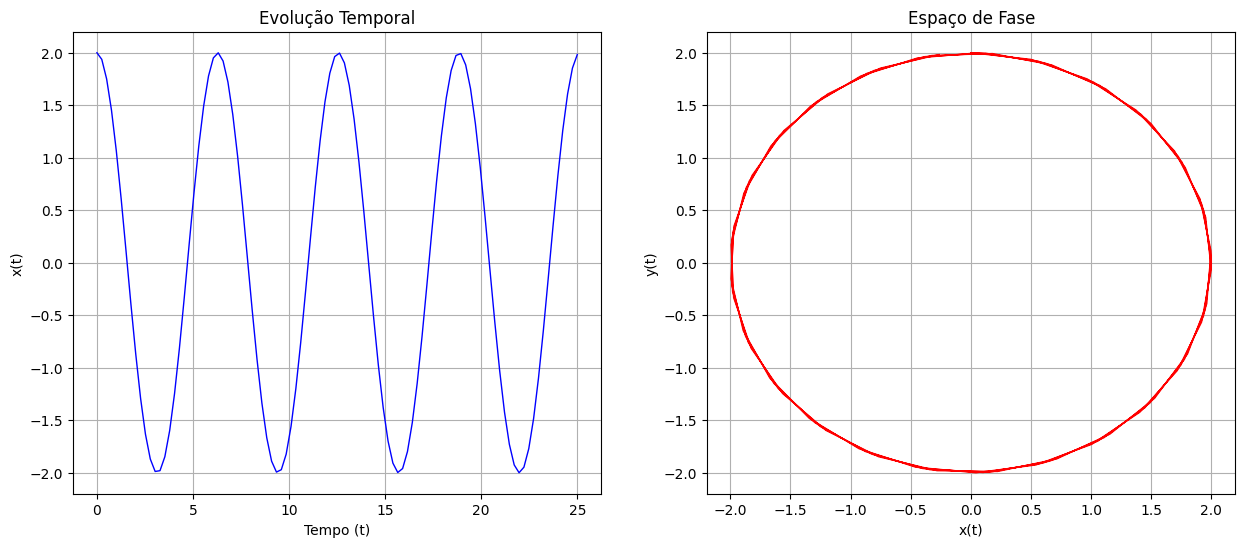

In [6]:
t3 = np.linspace(0,25,100)

PS = odeint(penduloSimples,[0,2],t3)

x3 = PS[:,0]
y3 = PS[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(t3,y3,'b-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x3,y3,'r-',linewidth=1)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

plt.show()

Já para o pêndulo amortecido, temos os resultados

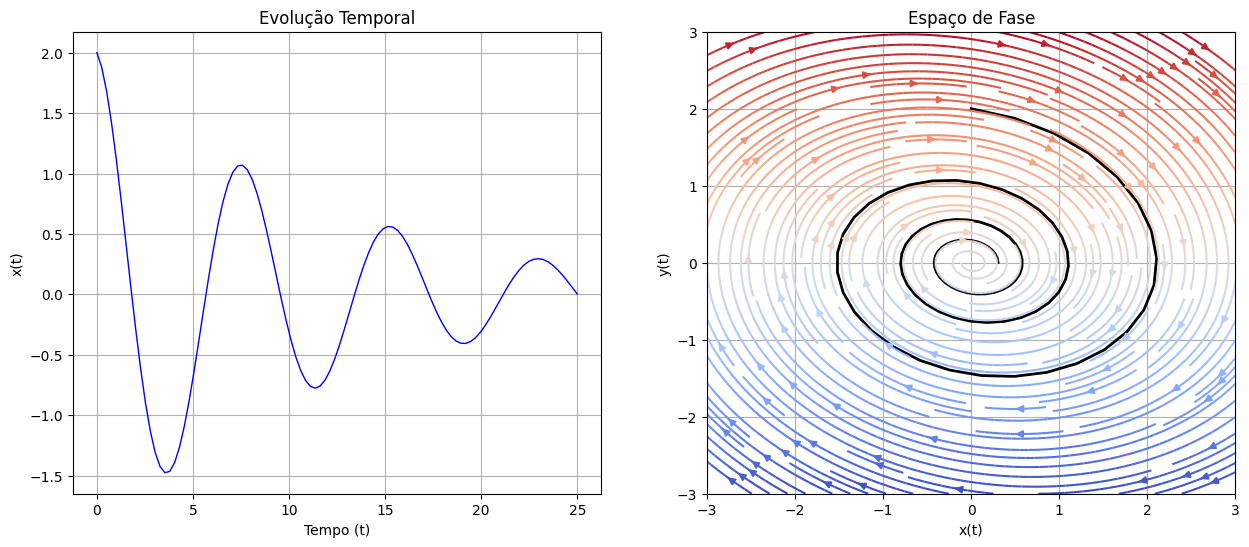

In [7]:
t3 = np.linspace(0,25,100)

PA = odeint(penduloAmortecido,[0,2],t3)

x3 = PA[:,0]
y3 = PA[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(t3,y3,'b-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x3,y3,'k-',linewidth=2)
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = Y
V = (-(k/m)*X - (c/m)*Y)

ax[1].streamplot(X,Y,U,V, density=2, color=U, cmap='coolwarm')

plt.show()

Fica evidente que ambos apresentam formas de curva distintas, tanto para a evolução temporal quanto para o espaço de fase.

Para o caso simples, o pêndulo oscila indeterminadamente, mantendo a trajetória circular no espaço de fase. Já para o caso amortecido, o pêndulo oscila até parar, fazendo do ponto $[x(t), \dot{x}(t)] = [0,0]$ uma espécie de "dreno", responsável por estabilizar a dinâmica do sistema para um regime estável.

E aqui fica um pouco mais evidente a importância do estudo do tópico escolhido, ou seja, da estabilidade de sistemas dinâmicos. Como saber quais os pontos de estabilidade para sistemas que conhecemos ou não a sua evolução ao longo do tempo?

### Conexão com Álgebra Linear

#### Solução e autovalores

Em primeiro lugar, vamos analisar a solução de sistemas dinâmicos (Sistemas de Equações Diferenciais) e sua conexão com autovalores. Como exemplo, seja a mesma equação para o sistema massa-mola com amortecimento.

$$
m\ddot{x} + c \dot{x} + kx = 0
$$

Se definirmos uma nova variável $y(t) = \dot{x}$ temos que $\dot{y} = \ddot{x}$ e, portanto

$$
\begin{align}
\dot{x} &= y \\
\dot{y} &= \ddot{x} = -\frac{k}{m}x - \frac{c}{m} y
\end{align}
$$

Agora seja $X = [x_1, x_2, ..., x_n]$ variáveis de um sistema dinâmico no espaço $\mathcal{R}^n$. Cada variável está vinculada à sua respectiva taxa de variação no tempo. Assim, $\dot{X} = [\dot{x_1}, \dot{x_2}, ..., \dot{x_n}]$. Logo podemos reescrever as equações acima matricialmente na forma

$$
\left[
\begin{array}{c}
\dot{x} \\
\dot{y}
\end{array}
\right] = 
\left[
\begin{array}{cc}
0 & 1 \\
-k/m & -c/m
\end{array}
\right]
\left[
\begin{array}{c}
x \\
y
\end{array}
\right] \leftrightarrow
\dot{X} = A X
$$


Dessa forma, temos uma equação diferencial ordinária de $X$ em relação ao tempo $t$.

Sabemos que equações diferenciais desse tipo $\dot{x} = \lambda x$ apresentam solução $x(t) = C_0 e^{\lambda t}$, portanto podemos assumir uma solução na forma $X = e^{\lambda t} W$ (X e W vetores e W independente de $t$).

Assim $\dot{X} = A X$ pode ser reescrito como

$$
\dot{X} = \lambda e^{\lambda t} W = A e^{\lambda t} W 
$$

que implica em

$$
\lambda W = A W
$$

Essa relação nos indica que, com solução $X = e^{\lambda t} W$ para o sistema, $\lambda$ representa os autovalores da matriz $A$ e $W$ seus autovetores associados.

Para este caso em particular, temos que

$$
det(A - \mathcal{I}\lambda) = 0 
$$

$$
det
\left[
\begin{array}{cc}
-\lambda & 1 \\
-k/m & -c/m -\lambda
\end{array}
\right] = 
\lambda ^2 + \lambda \frac{c}{m} + \frac{k}{m} = 0
$$

representa seu polinômio característico.

Temos, neste caso, 

$$
\lambda_1 = \frac{-c+\sqrt{c^2-4mk}}{2m} \quad \quad \lambda_2=\frac{-c-\sqrt{c^2-4mk}}{2m}
$$

autovalores.

Finalmente, com os autovalores encontrados temos os autovetores $W_1 = [\alpha_1, \alpha_2]^T$ e $W_2 = [\beta_1, \beta_2]^T$ associados tais que a solução para o sistema é dada por

$$
\left[
\begin{array}{c}
x \\
y
\end{array}
\right] = C_1e^{\lambda_1 t} 
\left[
\begin{array}{c}
\alpha_1 \\
\alpha_2
\end{array}
\right]
+ C_2e^{\lambda_2 t}
\left[
\begin{array}{c}
\beta_1 \\
\beta_2
\end{array}
\right]
$$

Com $C_1$ e $C_2$ constantes para $t=0$

Reproduzindo o caso do oscilador amortecido do código exemplo anterior utilizando a formulação por autovalores e autovetores, temos

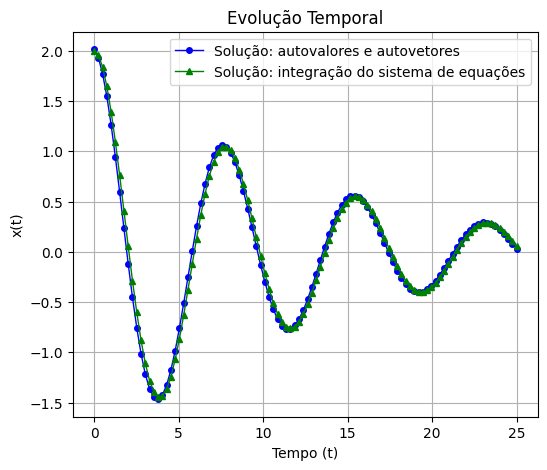

In [114]:
C1 = 0
C2 = 2.6

m = 3
k = 2
c = 1/2

A = np.array([[0, -k/m], [1, -c/m]])

t = np.linspace(0,25,100)

eigenVal, eigenVec = np.linalg.eig(A)

x = [C1 * np.exp(eigenVal[0] * ti) * eigenVec[:,0] + C2 * np.exp(eigenVal[1] * ti) * eigenVec[:,1] for ti in t]

plt.subplots(1,1,figsize=(6,5))

PA = odeint(penduloAmortecido,[2,0],t)

x3 = PA[:,0]

plt.plot(t, np.real(x)[:,1], 'bo-', ms=4, lw=1, label='Solução: autovalores e autovetores')
plt.plot(t, x3, 'g^-', ms=5, lw=1, label='Solução: integração do sistema de equações')
plt.title('Evolução Temporal')
plt.ylabel('x(t)')
plt.xlabel('Tempo (t)')
plt.legend(loc='best')
plt.grid()


Cujos resultados são similares aos obtidos anteriormente.

#### Interpretação de autovalores e autovetores

Sabendo agora a importância de autovalores e autovetores na solução de sistemas dinâmicos, vamos considerar um outro exemplo para entender o que estas quantidades representam.

Seja o sistema

$$
\left[
\begin{array}{c}
\dot{x} \\
\dot{y}
\end{array}
\right] =
\left[
\begin{array}{cc}
1 & 1 \\
4 & -2
\end{array}
\right]
\left[
\begin{array}{c}
x \\
y
\end{array}
\right]
$$

In [39]:
A = np.array([[1,4], [1,-2]]).T
eigenVal, eigenVec = np.linalg.eig(A)
print("Autovalores:")
print(eigenVal)
print("\nAutovetores:")
print(eigenVec)

Autovalores:
[ 2. -3.]

Autovetores:
[[ 0.70710678 -0.24253563]
 [ 0.70710678  0.9701425 ]]


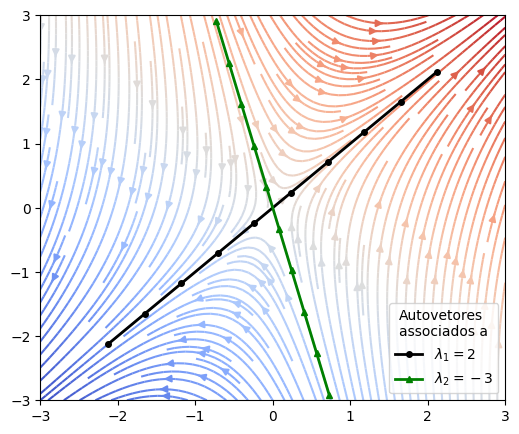

In [92]:
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = X + Y
V = 4*X - 2*Y

t = np.linspace(-3,3,10)

l1 = np.array([[eigenVec[:,0][0] * i, eigenVec[:,0][1] * i] for i in t])
l2 = np.array([[eigenVec[:,1][0] * i, eigenVec[:,1][1] * i] for i in t])

plt.figure(figsize=(6,5))
plt.streamplot(X,Y,U,V, density=2, color=U, cmap='coolwarm')
plt.plot(l1[:,0], l1[:,1], 'ko-', lw=2, ms=4, label=r'$\lambda_1 = 2$')
plt.plot(l2[:,0], l2[:,1], 'g^-', lw=2, ms=4, label=r'$\lambda_2 = -3$')
plt.legend(title='Autovetores\nassociados a', loc='lower right')
plt.show()

O autovetor associado a $\lambda_1 = 2$ direciona o fluxo para além da origem, enquanto o autovetor associado a $\lambda_2 = -3$ direciona o fluxo a origem.

Fica evidente que autovalores $\lambda_i < 0$ representam comportamento de convergência para um ponto, levando o sistema à regimes estáveis. Por outro lado $\lambda_i > 0$ indicam comportamentos de divergência de um ponto, levando à instabilidade do sistema dinâmico.

Comportamento interessante também pode ser avaliado com $\lambda \in \mathcal{C}$ complexos.

Sabemos que é válida a igualdade de euler $e^{i \theta} = cos \theta + i sin \theta$. Quando lembramos que autovalores correspondem ao argumento de exponenciais na solução de sistemas dinâmicos, é esperado um comportamento cíclico caso $\lambda_i \in \mathcal{C}$.

Por fim, vamos retornar ao caso do oscilador amortecido



In [93]:
m = 3
k = 2
c = 1/2

A = np.array([[0,-k/m], [1,-c/m]]).T
eigenVal, eigenVec = np.linalg.eig(A)
print("Autovalores:")
print(eigenVal)
print("\nAutovetores:")
print(eigenVec)

Autovalores:
[-0.08333333+0.81223286j -0.08333333-0.81223286j]

Autovetores:
[[ 0.77459667+0.j          0.77459667-0.j        ]
 [-0.06454972+0.62915287j -0.06454972-0.62915287j]]


Os autovalores nesse caso representam valores complexos, sendo $\lambda_2$ o complexo conjugado de $\lambda_1$, com parte real $Re(\lambda_i) < 0$.

O fato de ser complexo indica comportamento cíclico e $Re(\lambda_i) < 0$ indica a tendência a convergir para a origem, ou também chamado de estabilidade assintótica. Comportamento este que é esperado no sistema em estudo.

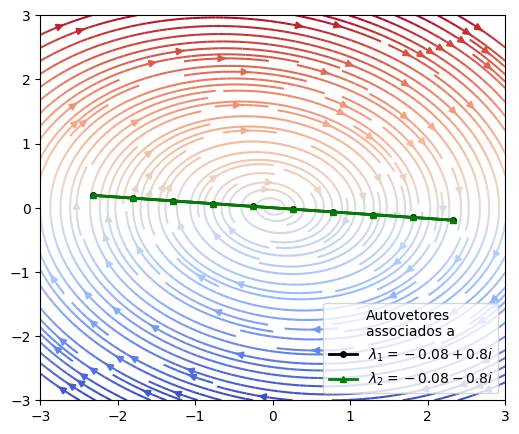

In [96]:
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = Y
V = (-(k/m)*X - (c/m)*Y)

t = np.linspace(-3,3,10)

l1 = np.array([[np.real(eigenVec[:,0][0]) * i, np.real(eigenVec[:,0][1]) * i] for i in t])
l2 = np.array([[np.real(eigenVec[:,1][0]) * i, np.real(eigenVec[:,1][1]) * i] for i in t])

plt.figure(figsize=(6,5))
plt.streamplot(X,Y,U,V, density=2, color=U, cmap='coolwarm')
plt.plot(l1[:,0], l1[:,1], 'ko-', lw=2, ms=4, label=r'$\lambda_1 = -0.08+0.8i$')
plt.plot(l2[:,0], l2[:,1], 'g^-', lw=2, ms=4, label=r'$\lambda_2 = -0.08-0.8i$')
plt.legend(title='Autovetores\nassociados a', loc='lower right')
plt.show()

#### Estabilidade: matriz Jacobiana

Até agora temos a solução de sistemas dinâmicos (equações diferenciais) e análise de estabilidade por meio de autovalores e autovetores.

Uma segunda análise que temos possível para sistemas de equações faz uso da matriz Jacobiana, e vamos tomar como exemplo o sistema conhecido como "predador-presa", ou equações de Lotka-Volterra.

este sistema pode ser descrito como

$$
\begin{align}
\dot{x} &= rx(1-x)-axy \\
\dot{y} &= ay(x-y)
\end{align}
$$

Onde $r$ representa a taxa de crescimento da população $x$ e $a$, o crescimento da população $y$ ($a$ também pode ser entendido como a "taxa de conversão" de presa em predador).

Os pontos de equilíbrio são aqueles tais que $\dot{x} = 0$ e $\dot{y} = 0$. Temos, portanto $(x,y) = \{(0,0), (1,0), (x*,y*)\}$, onde

$$
(x*,y*) = \left(\frac{r}{a+r}, \frac{r}{a+r} \right)
$$

Para sistemas mais complexos, seja $f:\mathcal{R}^n \to \mathcal{R}^n$ tal que $f = [f_1, f_2, ..., f_n]$, podemos definir a matrix de Jacobi $J$ como sendo 

$$
J_f = 
\left[
\begin{array}{cccc}
\partial_{x_1} f_1 & \partial_{x_2} f_1 & ... & \partial_{x_n} f_1 \\
\partial_{x_1} f_2 & \partial_{x_2} f_2 & ... & \partial_{x_n} f_2 \\
... & & ... &  \\
\partial_{x_1} f_n & \partial_{x_2} f_n & ... & \partial_{x_n} f_n \\
\end{array}
\right]
$$

Onde 

$$
\partial _{x_i} f_j = \frac{\partial f_j}{\partial x_i}
$$ 

Podemos interpretar cada linha da matriz $J$ como sendo a taxa de variação infinitesimal da funcão $f_i$ ao longo de cada dimensão do espaço considerado, com paralelo imediato em expansões de Taylor para aproximação de uma dada função. Aqui não detalharemos este ponto e vamos buscar entender a importância de $J_f$ e de seus autovalores no estudo de estabilidade.

Até então todos os casos que analisamos tinham apenas um ponto de estabilidade/instabilidade desejado para estudo, que coincidia com a origem. Agora quando obtemos os autovalores e autovetores de $J_f$ conseguimos entender como é o comportamento ao longo de todas as dimensões, na região no entorno deste ponto.

Voltando ao caso do sistema "predador-presa". Vamos assumir $r = 4$ e $a = 2$. Sabemos que existem 3 pontos de comportamento instável ou estável e, para $r = 4$ e $a = 2$, os pontos são $(x,y) = [(0,0), (0,1), (4/6,4/6)]$.

Dessa forma

$$
J_f = 
\left[
\begin{array}{cc}
r - 2rx-ay & -ax \\
ay & ax-2ay
\end{array}
\right]
$$

de modo que

$$
J_f(0,0) = 
\left[
\begin{array}{cc}
4 & 0 \\
0 & 0
\end{array}
\right] \quad \quad
J_f(0,1) = 
\left[
\begin{array}{cc}
2 & 0 \\
2 & -4
\end{array}
\right] \quad \quad
J_f(4/6, 4/6) =
\left[
\begin{array}{cc}
-2.666 & -1.333 \\
1.333 & -1.333
\end{array}
\right]
$$

In [148]:
r = 4
a = 2

x,y = 0,0
A = np.array([[r-2*r*x-a*y, a*y], [-a*x, a*x-2*a*y]]).T
print("Matriz:")
print(A)
eigenVal, eigenVec = np.linalg.eig(A)
print("\nAutovalores:")
print(eigenVal)
print("\nAutovetores:")
print(eigenVec)

Matriz:
[[4 0]
 [0 0]]

Autovalores:
[4. 0.]

Autovetores:
[[1. 0.]
 [0. 1.]]


In [149]:
x,y = 0,1
A = np.array([[r-2*r*x-a*y, a*y], [-a*x, a*x-2*a*y]]).T
print("Matriz:")
print(A)
eigenVal, eigenVec = np.linalg.eig(A)
print("\nAutovalores:")
print(eigenVal)
print("\nAutovetores:")
print(eigenVec)

Matriz:
[[ 2  0]
 [ 2 -4]]

Autovalores:
[-4.  2.]

Autovetores:
[[0.         0.9486833 ]
 [1.         0.31622777]]


In [151]:
x,y = 4/6,4/6
A = np.array([[r-2*r*x-a*y, a*y], [-a*x, a*x-2*a*y]]).T
print("Matriz:")
print(A)
eigenVal, eigenVec = np.linalg.eig(A)
print("\nAutovalores:")
print(eigenVal)
print("\nAutovetores:")
print(eigenVec)

Matriz:
[[-2.66666667 -1.33333333]
 [ 1.33333333 -1.33333333]]

Autovalores:
[-2.+1.15470054j -2.-1.15470054j]

Autovetores:
[[ 0.70710678+0.j          0.70710678-0.j        ]
 [-0.35355339-0.61237244j -0.35355339+0.61237244j]]


Temos, portanto, as seguintes relações:

$$
\begin{align}
(0,0)&: \quad \lambda _1 = 4, &\quad &\lambda _2 = 0 \\
(0,1)&: \quad \lambda _1 = -4, &\quad &\lambda _2 = 2 \\
(4/6,4/6)&: \quad \lambda _1 = -2+1.15i, &\quad &\lambda _2 = -1-1.15i \\
\end{align}
$$

Que nos indica que o ponto $(0,0)$ é instável, já que $\lambda _1 > 0$, embora não possamos qualificar de imediato, visto que deve haver alguma bifurcação, pois $\lambda_2 = 0$. Existem muitos estudos sobre fenômenos de bifurcação, mas aqui, não entraremos em mais detalhes.

Já para o ponto $(0,1)$ temos instabilidade com ponto de sela, com dispersão e conversão de fluxo em seu entorno (pois $\lambda _1 < 0$ e $\lambda_2 > 0$), e por fim, para $(4/6,4/6)$ temos comportamento cíclico ($\lambda_i \in \mathcal{C}$) com espiral convergindo ao seu centro (pois $Re(\lambda_i) < 0$, para $i=1,2$).

Dessa forma, sem que tenha sido resolvido o sistema proposto, conhecemos seus pontos críticos e o comportamento em seu entorno. Por se tratar de um sistema razoavelmente simples, podemos verificar a evolução no tempo e seu espaço de fase

In [130]:
r = 4
a = 2

def predadorPresa(X, t=0):
  x = X[0]
  y = X[1]

  dxdt = r*x*(1-x) - a*y*x
  dydt = a*y*(x-y)

  return [dxdt, dydt]

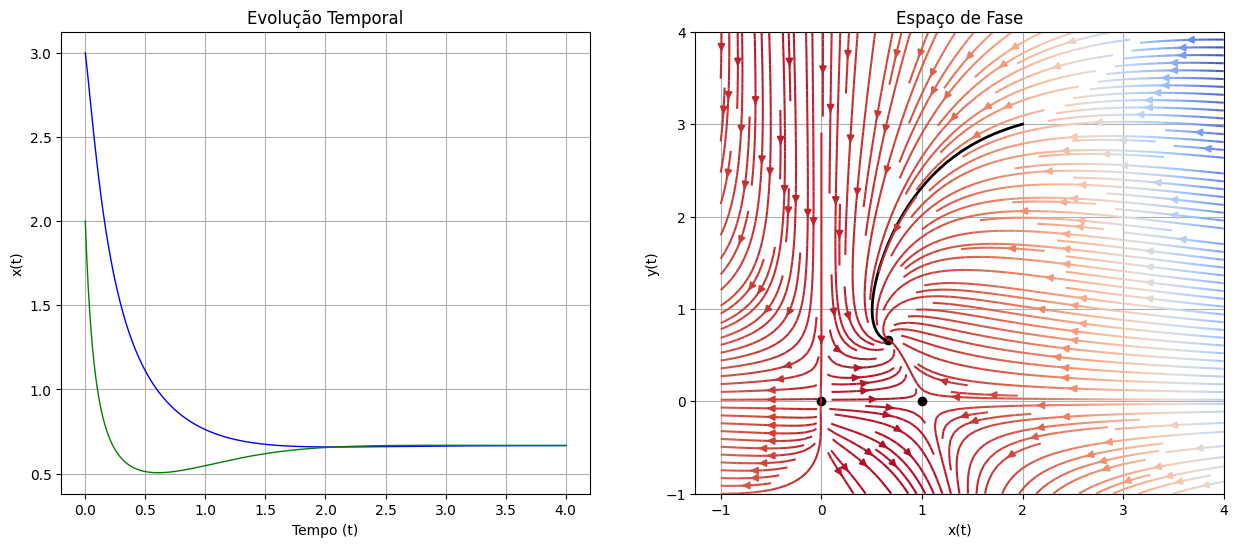

In [143]:
t = np.linspace(0,4,1000)

PP = odeint(predadorPresa, [2,3], t)

x = PP[:,0]
y = PP[:,1]

fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(t,y,'b-',linewidth=1)
ax[0].plot(t,x,'g-',linewidth=1)
ax[0].set_title("Evolução Temporal")
ax[0].set_xlabel('Tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].grid(True)

ax[1].plot(x,y,'k-',linewidth=2)
ax[1].plot(0,0,'ko')
ax[1].plot(1,0,'ko')
ax[1].plot(r/(a+r),r/(a+r),'ko')
ax[1].set_title("Espaço de Fase")
ax[1].set_xlabel('x(t)')
ax[1].set_ylabel('y(t)')
ax[1].grid(True)

Y, X = np.mgrid[-1:4:100j, -1:4:100j]
U = r*X*(1-X) - a*Y*X
V = a*Y*(X-Y) 

ax[1].streamplot(X,Y,U,V, density=2, color=U, cmap='coolwarm')

plt.show()

Como vemos, os resultados conferem com a análise feita anteriormente sobre os pontos em destaque no mapa de fluxo.

### Conclusão

Neste trabalho pudemos compreender um pouco melhor a importância de métodos de álgebra linear para estudos de sistemas de equações diferenciais, em especial no que se refere a análise de autovalores e autovetores.

Em particular, estudamos estes métodos em relação à solução destes sistemas, construindo soluções baseadas em autovalores e autovetores da matriz associada ao sistema desejado, e também em termos do estudo de sistemas mais complexos (que não são facilmente integrados e, assim, não apresentam equações temporais analíticas fáceis de se obter) para o estudo local de pontos de estabilidade ou instabilidade, assintótica ou não.